In [1]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import torch

/Users/yedijamessa/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/yedijamessa/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

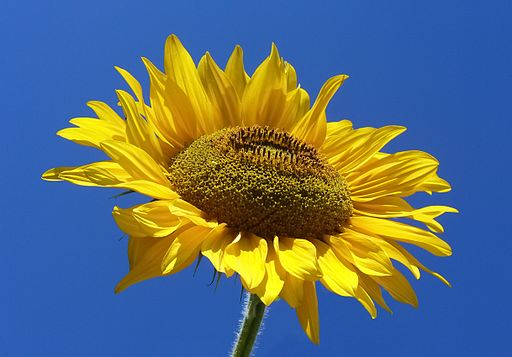

In [8]:
image = Image.open("image.jpg")
image

In [9]:
inputs = processor(image, return_tensors="pt")
inputs

{'pixel_values': tensor([[[[-0.9893, -0.9893, -0.9893,  ..., -1.2229, -1.2229, -1.1937],
          [-0.9893, -0.9893, -0.9893,  ..., -1.2229, -1.2229, -1.1937],
          [-0.9893, -0.9893, -0.9893,  ..., -1.2229, -1.2229, -1.1937],
          ...,
          [-1.1061, -1.1061, -1.1207,  ..., -1.2375, -1.2375, -1.2375],
          [-1.1061, -1.1061, -1.1207,  ..., -1.2375, -1.2375, -1.2375],
          [-1.0915, -1.1061, -1.1207,  ..., -1.2375, -1.2375, -1.2375]],

         [[-0.1763, -0.1763, -0.1763,  ..., -0.4464, -0.4464, -0.4164],
          [-0.1763, -0.1763, -0.1763,  ..., -0.4464, -0.4464, -0.4164],
          [-0.1763, -0.1763, -0.1763,  ..., -0.4464, -0.4464, -0.4164],
          ...,
          [-0.3264, -0.3264, -0.3414,  ..., -0.5065, -0.5065, -0.5065],
          [-0.3264, -0.3264, -0.3414,  ..., -0.5065, -0.5065, -0.5065],
          [-0.3114, -0.3264, -0.3414,  ..., -0.5065, -0.5065, -0.5065]],

         [[ 1.2500,  1.2500,  1.2500,  ...,  0.9656,  0.9656,  0.9941],
          [ 1

In [11]:
outputs = model.generate(**inputs)
outputs

/Users/yedijamessa/Library/Python/3.9/lib/python/site-packages/transformers/generation/utils.py:1168: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


tensor([[30522,  1037,  3103, 14156,  2114,  1037,  2630,  3712,   102]])

In [12]:
caption = processor.decode(outputs[0], skip_special_tokens=True)

In [13]:
print("Generated Caption: ", caption)

Generated Caption:  a sunflower against a blue sky
